<a href="https://colab.research.google.com/github/sajid-munawar/Introduction-to-TensorFlow-for-Artificial-Intelligence-Machine-Learning-and-Deep-Learning/blob/main/A_Computer_Vision_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.6.0


In [ ]:
mnist=tf.keras.datasets.fashion_mnist

In [ ]:
(training_images,training_labels), (test_images, test_labels)=mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
np.set_printoptions(linewidth=200)

9


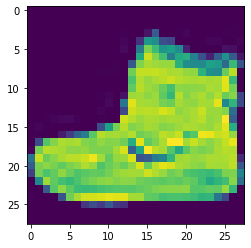

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])

## If we treat all values as between 0 and 1, a process called 'normalizing'

In [ ]:
training_images= training_images/255.0
test_images = test_images/255.0

In [ ]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images,training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5046 - accuracy: 0.8256
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3772 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3398 - accuracy: 0.8758
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3163 - accuracy: 0.8832
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2971 - accuracy: 0.8908


In [ ]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3485 - accuracy: 0.8748


[0.34853485226631165, 0.8748000264167786]

Exercise

In [ ]:
classification=model.predict(test_images)

In [ ]:
print(classification[0])

[6.6801908e-07 6.8010820e-08 3.4963946e-07 2.2122931e-07 3.8977765e-07 2.2376686e-02 2.7392280e-06 1.5961070e-02 6.8003210e-05 9.6158987e-01]


In [ ]:
print(test_labels[0])

9


**Mnist data**

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
mnist=tf.keras.datasets.mnist

In [ ]:
(training_images,training_labels),(test_images,test_labels)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
training_images=training_images/255.0
test_images=test_images/255.0

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(1024,activation='relu'),
                                                 tf.keras.layers.Dense(10,activation='softmax')])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

In [ ]:
model.fit(training_images,training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1839
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0726
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0477
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0348
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0246


In [ ]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0754


0.07540443539619446

In [ ]:
classification=model.predict(test_images)

In [ ]:
print(classification[0])
print(test_labels[0])

[1.1943399e-08 5.1075583e-10 2.3619904e-09 3.1303337e-06 1.2108835e-14 5.9593194e-12 1.2727729e-12 9.9999690e-01 1.1160386e-08 2.9746445e-08]
7


###**Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying**

**Callbacks**

In [9]:
import tensorflow as tf
acc=float(input('please put required accuracy'))
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if (logs.get('accuracy') >= acc):
      print(f'\n Accuracy reached at {acc}% so cancelling further training')
      self.model.stop_training=True

please put required accuracy0.9


In [10]:
callbacks=myCallback()
mnist=tf.keras.datasets.mnist
(training_images,training_labels),(test_images,test_labels)=mnist.load_data()
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128,activation='relu'),
                                  tf.keras.layers.Dense(10,activation='softmax')])
model.compile(optimizer='adam' ,loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
model.fit(training_images,training_labels,epochs=5,callbacks=[callbacks])
model.evaluate(test_images,test_labels)
classification=model.predict(test_images)
print(classification[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.5153 - accuracy: 0.8478
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3602 - accuracy: 0.9113

 Accuracy reached at 0.9% so cancelling further training
313/313 [==============================] - 1s 1ms/step - loss: 0.3237 - accuracy: 0.9290
[9.2993762e-37 4.0523998e-28 1.4303297e-12 2.8358590e-06 0.0000000e+00
 1.6021150e-25 0.0000000e+00 9.9999714e-01 1.6371265e-25 1.5710385e-16]
7
